In [1]:
import importlib
from library import data_preprocess as dp
import matplotlib.pyplot as plt
importlib.reload(dp)
import pickle

In [2]:
#https://www.kaggle.com/kazanova/sentiment140/data
file_path1 = "./data/training.1600000.processed.noemoticon.csv"

In [3]:
tweets = list(set(dp.load_data(file_path1, header=False, sep=',', usecols=[5])[5].str.lower().values))
print(len(tweets))
print(tweets[:2])

1577443
["@hodgman but she's deeeaaad  - a batman's opinion", "@oconel me too - she usually is early and i think her computer was on when i got here but now it looks like it's locked or she's left "]


In [4]:
unique_chars = dp.get_unique_chars(tweets)
print(len(unique_chars))
print(unique_chars)

150
['\t', ' ', '!', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '?', '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '\x7f', '\xa0', '¡', '¢', '£', '¤', '¥', '¦', '§', '¨', '©', 'ª', '«', '¬', '\xad', '®', '¯', '°', '±', '²', '³', '´', 'µ', '¶', '·', '¸', '¹', 'º', '»', '¼', '½', '¾', '¿', '×', 'ß', 'à', 'á', 'â', 'ã', 'ä', 'å', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'ì', 'í', 'î', 'ï', 'ð', 'ñ', 'ò', 'ó', 'ø', 'ù', 'ú', 'û', 'ÿ', 'œ', 'š', 'ž', 'ƒ', 'ˆ', '˜', '–', '—', '‘', '’', '‚', '“', '”', '„', '†', '‡', '•', '…', '‰', '‹', '›', '€', '™']


In [ ]:
dp.get_char_presence(quotes)

In [5]:
print("Total number of tweets = ", len(tweets))
filter_tweets = dp.filter_data(tweets, "^[a-zA-Z !\"',.?\-\:\*]+$")
print(len(filter_tweets))
print(filter_tweets[:10])

Total number of tweets =  1577443
577841
['seriously, why is it so difficult to find a decide lamp shade around here?  two days of looking and still no winners ', "morning all. it's raining here  hope the gals had a ball last night - duh i reckon that's a given xx", 'uhh! surveys! dlsu-m people! who wants to answer surveys? pm me ', 'loving rich people who flaunt their money ', 'is looking at some old pictures.. ah!! those were the days.. ', 'dont wanna go back to lex, where only sadness and pain awaits me ', 'i feel bad, this headache is very strong!!!  sometimes it bothers to be sick...', 'on a new work out routine  so pooped after it!', 'is at south molton vintage ralley! ', 'going shopping right now ']


In [16]:
pad_chars = [' ', '!', '"', '*', ',', '-', ':', '?']
clean_tweets = dp.clean_data(tweets, "^[a-zA-Z !\"'*,\-.:?]+$", pad_chars)

unique_chars = dp.get_unique_chars(clean_tweets)
print(len(unique_chars))
print(unique_chars)

clean_tweets = dp.tokenize(clean_tweets)

print(len(clean_tweets))
print(clean_tweets[:2])

# stats of number of tokens in the sentence
dp.get_len_stats(clean_tweets)

35
[' ', '!', "'", '*', ',', '-', '.', ':', '?', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
577841
[['seriously', ',', 'why', 'is', 'it', 'so', 'difficult', 'to', 'find', 'a', 'decide', 'lamp', 'shade', 'around', 'here', '?', 'two', 'days', 'of', 'looking', 'and', 'still', 'no', 'winners'], ['morning', 'all', '.', "it's", 'raining', 'here', 'hope', 'the', 'gals', 'had', 'a', 'ball', 'last', 'night', '-', 'duh', 'i', 'reckon', "that's", 'a', 'given', 'xx']]
min of length:  1
max of length:  65
average length:  13.406289965578766
mode of length:  7


In [17]:
MIN_NUM_TOKENS = 10
MAX_NUM_TOKENS = 40
clean_tweets = dp.filter_data_on_length(clean_tweets, MIN_NUM_TOKENS, MAX_NUM_TOKENS)
print(len(clean_tweets))

362932


In [18]:
word_freqs = dp.get_vocabulary(clean_tweets)

In [19]:
dp.get_vocabulary_stats(word_freqs)

Total vocabulary:  120011
average of frequency:  53.44429260651107
mode of frequency:  1


In [20]:
filtered_words = dp.filter_words(word_freqs, 20)
print("Number of filtered words = ", len(filtered_words))
sents = dp.get_sentences_with_words(clean_tweets, filtered_words)
print(len(sents))
print(sents[:5])

Number of filtered words =  10146
192898
[['seriously', ',', 'why', 'is', 'it', 'so', 'difficult', 'to', 'find', 'a', 'decide', 'lamp', 'shade', 'around', 'here', '?', 'two', 'days', 'of', 'looking', 'and', 'still', 'no', 'winners'], ['morning', 'all', '.', "it's", 'raining', 'here', 'hope', 'the', 'gals', 'had', 'a', 'ball', 'last', 'night', '-', 'duh', 'i', 'reckon', "that's", 'a', 'given', 'xx'], ['is', 'looking', 'at', 'some', 'old', 'pictures', 'threedots', 'ah', '!', 'those', 'were', 'the', 'days', 'threedots'], ['i', 'feel', 'bad', ',', 'this', 'headache', 'is', 'very', 'strong', '!', 'sometimes', 'it', 'bothers', 'to', 'be', 'sick', 'threedots'], ['on', 'a', 'new', 'work', 'out', 'routine', 'so', 'pooped', 'after', 'it', '!']]


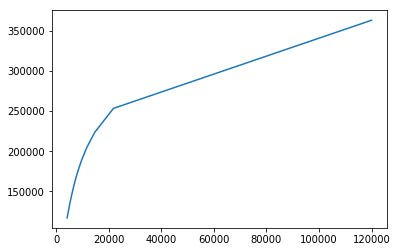

In [21]:
# Analysis for choosing optimum word freq cut off
freqsL = list(range(1, 80, 5))
num_words = []
num_sents = []
for x in freqsL:
    filtered_words = dp.filter_words(word_freqs, x)
    num_words.append(len(filtered_words))
    num_sents.append(len(dp.get_sentences_with_words(clean_tweets, filtered_words)))
plt.plot(num_words, num_sents)
plt.show()

In [22]:
# let's consider tweets whose vocabulary matches with that of jokes and quotes dataset
with open('./datasets/jokes_vocabulary.pickle', 'rb') as pickleFile:
    jokes_vocabulary = pickle.load(pickleFile)
    
with open('./datasets/quotes_vocabulary.pickle', 'rb') as pickleFile:
    quotes_vocabulary = pickle.load(pickleFile)

final_vocabulary = jokes_vocabulary
final_vocabulary.extend(quotes_vocabulary)
final_vocabulary = list(set(final_vocabulary))
print("vocabulary size = ", len(final_vocabulary))

final_clean_tweets = dp.get_sentences_with_words(clean_tweets, final_vocabulary)
print("Number of sentences: ", len(final_clean_tweets))
print(final_clean_tweets[:10])

vocabulary size =  12644
Number of sentences:  130547
[['seriously', ',', 'why', 'is', 'it', 'so', 'difficult', 'to', 'find', 'a', 'decide', 'lamp', 'shade', 'around', 'here', '?', 'two', 'days', 'of', 'looking', 'and', 'still', 'no', 'winners'], ['is', 'looking', 'at', 'some', 'old', 'pictures', 'threedots', 'ah', '!', 'those', 'were', 'the', 'days', 'threedots'], ['on', 'a', 'new', 'work', 'out', 'routine', 'so', 'pooped', 'after', 'it', '!'], ['omg', 'my', 'head', 'feels', 'like', "it's", 'about', 'to', 'explode', 'threedots', 'i', 'miss', 'my', 'mummy'], ['my', 'temperature', 'is', 'going', 'back', 'up', 'i', 'just', 'want', 'to', 'get', 'better', '!'], ['so', 'sick', 'threedots', 'probably', "shouldn't", 'have', 'gone', 'to', 'work', '.', 'my', 'body', 'hates', 'me'], ['yeah', 'its', 'difficult', 'letting', 'you', 'down', 'threedots', 'knowing', 'its', 'all', 'my', 'fault', '.'], ['back', 'out', 'of', 'l', 'o', 'v', 'e', '.', 'ha', '!'], ['oh', 'no', '!', 'i', "don't", 'want', 'fe

In [23]:
# Let's append sos and eos tokens to all sentences
clean_tweets_final = [["sos"] + tokens + ["eos"] for tokens in final_clean_tweets]
clean_tweets_final = [' '.join(tokens) for tokens in clean_tweets_final]
clean_tweets_final = list(set(clean_tweets_final))

vocabulary_final = list(set(final_vocabulary + ["sos", "eos"]))
print("Final vocabulary size: ", len(vocabulary_final))
print("Number of sentences: ", len(clean_tweets_final))
print(clean_tweets_final[:5])
print(vocabulary_final[:10])

Final vocabulary size:  12644
Number of sentences:  130514
["sos certain times of the night bring in the most people and it's then that this happens quite frequently lately ! eos", 'sos going to look in the refrigerator for a taste snack to eat eos', "sos omg . i was just joking . now he deleted his twitter . great . i'm always the bad guy . eos", 'sos lindsay lohan took a photo of herself topless with her blackberry then posted it to twitter for the world to see eos', 'sos praise the lord for very best friends ! just picked mine up from the airport . eos']
['narnia', 'civil', 'requires', 'playboy', 'betting', 'possess', 'brady', 'bus', 'cattle', 'lord']


In [24]:
with open("./datasets/tweets.pickle","wb") as fop:
    pickle.dump(clean_tweets_final, fop)
    
with open("./datasets/tweets_vocabulary.pickle","wb") as fop:
    pickle.dump(vocabulary_final, fop)

In [25]:
print(clean_tweets_final[:15])

["sos certain times of the night bring in the most people and it's then that this happens quite frequently lately ! eos", 'sos going to look in the refrigerator for a taste snack to eat eos', "sos omg . i was just joking . now he deleted his twitter . great . i'm always the bad guy . eos", 'sos lindsay lohan took a photo of herself topless with her blackberry then posted it to twitter for the world to see eos', 'sos praise the lord for very best friends ! just picked mine up from the airport . eos', "sos just totally baked cookies and figured out what i'm wearing to dinner . eos", 'sos after facebook it seems hackers are now behind my twitter password . eos', "sos i don't even know why my eyes are open right now . i was having a very strange dream and then i heard my poor sick nephew crying eos", 'sos sleeping in my own bed tonight threedots at home ! eos', 'sos dropped my iphone it not working look for a replacement eos', 'sos the cat has settled himself on my lap and decided i am not